In [1]:
import json
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_style('whitegrid')

In [2]:
path = 'data/ad_music_proccessed.csv'
data = pd.read_csv(path,index_col=0)
data.head()

,timestamp,user_id,user_email,account_creation_date,subscription_status,account_tier,path,http_method,ip,org,...,command,device_age,cookie_age,country.1,country_age,asn_age,ua_age,browser_age,os_age,ip_age
0,2024-07-01 00:15:48,U747868,znguyen@yahoo.com,2020-09-08,paid,listener,/artist/A000872/song/S000058/song_details,GET,12.0.0.18,"AT&T Services, Inc.",...,song_details,591,307,United States,626,691,288,288,288,30
1,2024-07-01 00:18:48,U747868,znguyen@yahoo.com,2020-09-08,paid,listener,/artist/A000675/song/S000071/rate,POST,12.0.0.18,"AT&T Services, Inc.",...,rate,591,307,United States,626,691,288,288,288,30
2,2024-07-01 00:21:49,U747868,znguyen@yahoo.com,2020-09-08,paid,listener,/user/U747868/recommendations,GET,12.0.0.18,"AT&T Services, Inc.",...,recommendations,591,307,United States,626,691,288,288,288,30
3,2024-07-01 00:22:03,U747868,znguyen@yahoo.com,2020-09-08,paid,listener,/search,GET,12.0.0.18,"AT&T Services, Inc.",...,search,591,307,United States,626,691,288,288,288,30
4,2024-07-01 00:24:28,U747868,znguyen@yahoo.com,2020-09-08,paid,listener,/artist/A000179/song/S000120/pause,POST,12.0.0.18,"AT&T Services, Inc.",...,pause,591,307,United States,626,691,288,288,288,30


In [53]:
# Data Preproccess

def extract_user_features(user_feaures):
    user_feaures = json.loads(user_feaures)

    device_age = user_feaures['device_fingerprint']['age']
    cookie_age = user_feaures['cookie']['age']
    country = user_feaures['country']['value']
    country_age = user_feaures['country']['age']
    asn_age = user_feaures['org']['age']
    ua_age = user_feaures['user_agent']['age']
    browser_age = user_feaures['browser_family']['age']
    os_age = user_feaures['os_family']['age']
    ip_age = user_feaures['ip']['age']

    return [device_age,
            cookie_age,
            country,
            country_age,
            asn_age,
            ua_age,
            browser_age,
            os_age,
            ip_age]

path = 'data/AD_Music_Data_Sept_2024.csv'
data = pd.read_csv(path)
data['timestamp']  = pd.to_datetime(data['timestamp'], unit='s')
data['account_creation_date']  = pd.to_datetime(data['account_creation_date'], unit='s').dt.date
data['command'] = data['path'].apply(lambda x: x.split('/')[-1])
data['age'] = data.user_features.apply(lambda x: extract_user_features(x))
age = pd.DataFrame(data['age'].tolist(), columns=['device_age', 
                                                  'cookie_age', 
                                                  'country',
                                                  'country_age',
                                                  'asn_age',
                                                  'ua_age',
                                                  'browser_age',
                                                  'os_age',
                                                  'ip_age'])
data = pd.concat([data.drop(columns=['age']), age], axis=1)
data.to_csv('data/ad_music_proccessed.csv')


,timestamp,user_id,user_email,account_creation_date,subscription_status,account_tier,path,http_method,ip,org,asn,country,cookie,device_fingerprint,user_agent,browser_family,os_family,account_balance,user_features
0,1719792948,U747868,znguyen@yahoo.com,2020-09-08,paid,listener,/artist/A000872/song/S000058/song_details,GET,12.0.0.18,"AT&T Services, Inc.",AS7018,United States,afadea9349dccbd61d45ab08b0e9c5b5,ea7c091f8b471d08d7e433c1d1bd2683,Mozilla/5.0 (Windows NT 10.0; rv:120.0) Gecko/...,Firefox,Windows,0.0,"{""device_fingerprint"": {""value"": ""ea7c091f8b47..."
1,1719793128,U747868,znguyen@yahoo.com,2020-09-08,paid,listener,/artist/A000675/song/S000071/rate,POST,12.0.0.18,"AT&T Services, Inc.",AS7018,United States,afadea9349dccbd61d45ab08b0e9c5b5,ea7c091f8b471d08d7e433c1d1bd2683,Mozilla/5.0 (Windows NT 10.0; rv:120.0) Gecko/...,Firefox,Windows,0.0,"{""device_fingerprint"": {""value"": ""ea7c091f8b47..."


In [54]:
list(data.columns)

['timestamp',
 'user_id',
 'user_email',
 'account_creation_date',
 'subscription_status',
 'account_tier',
 'path',
 'http_method',
 'ip',
 'org',
 'asn',
 'country',
 'cookie',
 'device_fingerprint',
 'user_agent',
 'browser_family',
 'os_family',
 'account_balance',
 'user_features']

In [55]:
data.asn.unique()

array(['AS7018', 'AS45595', 'AS22773', 'AS7922', 'AS3269', 'AS2856',
       'AS3352', 'AS9299', 'AS4837'], dtype=object)

AS4837 - China Unicom (CN), 346k Hosted Domains
AS7922 - Comcast cables (US), 110k hosted domains
AS22773 - Cox COmmunication (US), 43k hosted domains
AS7018 - AT&T (US), 42k hosted Domains
AS3352 - Telefonic De Espana (SP), 37k Hosted Domains
AS2856 - British Telecom (US), 30k Hosted Domains
AS3269 - Telecom Italia (IT), 14k Hosted Domains
AS9299 - Philippine Long Distance (PH), 1600 Hosted Domains
AS45595 - Pakistan Telecom (PK), Hosted Domains

/var/folders/ms/zw030byx3qsfvlvyyfnnr7sm0000gn/T/ipykernel_13367/3504388026.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data.account_balance > 10][data.account_balance < 150].account_balance.hist(bins=50)


<Axes: >

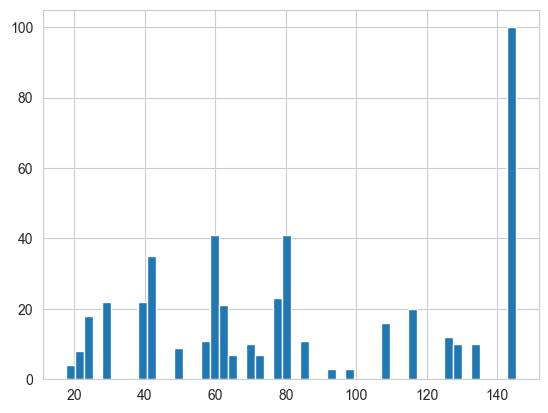

In [56]:
data[data.account_balance > 10][data.account_balance < 150].account_balance.hist(bins=50)

In [57]:
data.account_balance.describe()

count    93645.000000
mean        98.261748
std       1072.323927
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      38098.315840
Name: account_balance, dtype: float64

In [58]:
num_accounts_created = data.account_creation_date.value_counts().sort_index().values
dates = sorted(data.account_creation_date.unique())

Text(0, 0.5, 'Accounts Created')

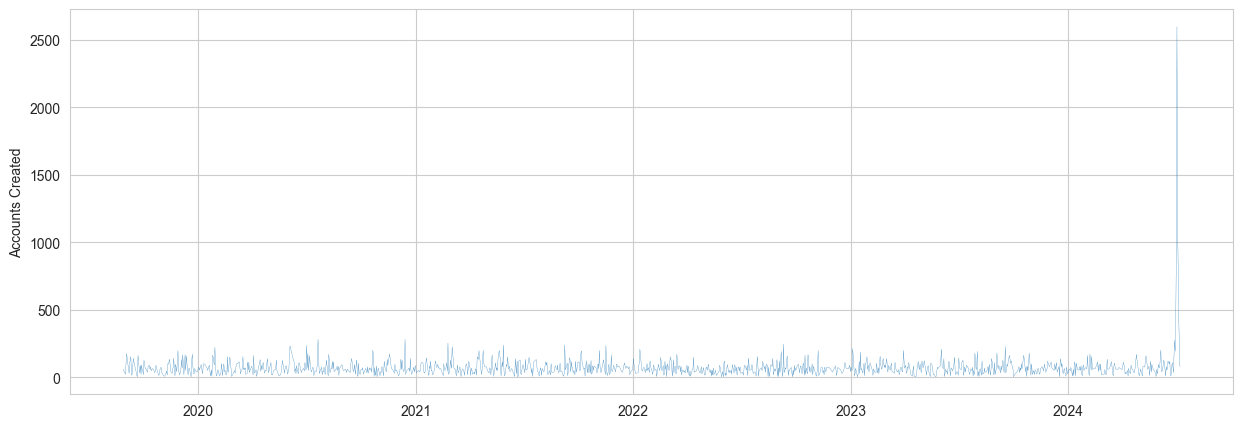

In [59]:
plt.figure(figsize=(15,5))
plt.plot(dates,num_accounts_created,lw=0.2)
plt.ylabel('Accounts Created')

In [60]:
data.columns

Index(['timestamp', 'user_id', 'user_email', 'account_creation_date',
       'subscription_status', 'account_tier', 'path', 'http_method', 'ip',
       'org', 'asn', 'country', 'cookie', 'device_fingerprint', 'user_agent',
       'browser_family', 'os_family', 'account_balance', 'user_features'],
      dtype='object')

In [61]:
data.email_domain = data.user_email.apply(lambda x: x.split('@')[1])
data.email_domain.value_counts()

/var/folders/ms/zw030byx3qsfvlvyyfnnr7sm0000gn/T/ipykernel_13367/461094640.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.email_domain = data.user_email.apply(lambda x: x.split('@')[1])


user_email
gmail.com            30376
yahoo.com            29766
hotmail.com          29069
tempmail.ru            546
mailinator.com         472
yopmail.com            459
fakemail.net           411
protonmail.com         367
trashmail.com          325
yandex.ru              324
temp-mail.org          318
dispostable.com        307
10minutemail.com       290
gmx.com                268
mail.ru                218
guerrillamail.com      129
Name: count, dtype: int64

In [62]:
gp = data[['user_email']].groupby([data.account_creation_date,data.email_domain]).count().unstack(fill_value=0)
gp

user_email                                         \
user_email            10minutemail.com dispostable.com fakemail.net gmail.com   
account_creation_date                                                           
2019-08-29                           0               0            0         0   
2019-09-02                           0               0            0         0   
2019-09-03                           0               0            0         0   
2019-09-04                           0               0            0        59   
2019-09-05                           0               0            0        49   
...                                ...             ...          ...       ...   
2024-07-02                           0              43           85       270   
2024-07-03                           0              25          117        53   
2024-07-04                          25              44          109        63   
2024-07-05                           0               0            0         0   
2024-07-06                           0              23            0        57   

                                                                     \
user_email            gmx.com guerrillamail.com hotmail.com mail.ru   
account_creation_date                                                 
2019-08-29                  0                 0          19       0   
2019-09-02                  0                 0          23       0   
2019-09-03                  0                 0         111       0   
2019-09-04                  0                 0          72       0   
2019-09-05                  0                 0           0       0   
...                       ...               ...         ...     ...   
2024-07-02                  0                95         131       0   
2024-07-03                 65                 0          36      22   
2024-07-04                  0                 0          11       0   
2024-07-05                 63                 0           0       0   
2024-07-06                  0                 0           0       0   

                                                                               \
user_email            mailinator.com protonmail.com temp-mail.org tempmail.ru   
account_creation_date                                                           
2019-08-29                         0              0             0           0   
2019-09-02                         0              0             0           0   
2019-09-03                         0              0             0           0   
2019-09-04                         0              0             0           0   
2019-09-05                         0              0             0           0   
...                              ...            ...           ...         ...   
2024-07-02                       119             69             0          84   
2024-07-03                         0              0             0         141   
2024-07-04                        62             23            24          42   
2024-07-05                         0              0            23          42   
2024-07-06                         0              0             0           0   

                                                                     
user_email            trashmail.com yahoo.com yandex.ru yopmail.com  
account_creation_date                                                
2019-08-29                        0        43         0           0  
2019-09-02                        0         0         0           0  
2019-09-03                        0         8         0           0  
2019-09-04                        0        45         0           0  
2019-09-05                        0        84         0           0  
...                             ...       ...       ...         ...  
2024-07-02                       25       197         0          65  
2024-07-03                       55       152        82        

In [85]:
gp[-50:]

user_email                                         \
user_email            10minutemail.com dispostable.com fakemail.net gmail.com   
account_creation_date                                                           
2024-05-01                           0               0            0        63   
2024-05-02                           0               0            0         0   
2024-05-04                           0               0            0        11   
2024-05-05                           0               0            0        42   
2024-05-08                           0               0            0        62   
2024-05-10                           0               0            0        76   
2024-05-13                           0               0            0        26   
2024-05-15                           0               0            0        21   
2024-05-16                           0               0            0         0   
2024-05-18                           0               0            0         0   
2024-05-19                           0               0            0        40   
2024-05-20                           0               0            0        96   
2024-05-22                           0               0            0         0   
2024-05-26                           0               0            0         0   
2024-05-27                           0               0            0         0   
2024-05-28                           0               0            0        59   
2024-05-29                           0               0            0         0   
2024-05-31                           0               0            0        55   
2024-06-01                           0               0            0         0   
2024-06-02                           0               0            0         0   
2024-06-04                           0               0            0         0   
2024-06-05                           0               0            0         0   
2024-06-07                           0               0            0         0   
2024-06-08                           0               0            0        40   
2024-06-09                           0               0            0        67   
2024-06-11                           0               0            0         0   
2024-06-12                           0               0            0         0   
2024-06-13                           0               0            0         0   
2024-06-14                           0               0            0         5   
2024-06-15                           0               0            0         0   
2024-06-16                           0               0            0        12   
2024-06-18                           0               0            0        75   
2024-06-19                           0               0            0        81   
2024-06-20                           0               0            0         0   
2024-06-21                           0               0            0         0   
2024-06-22                           0               0            0        75   
2024-06-23                           0               0            0        70   
2024-06-24                           0               0            0         0   
2024-06-25                           0              16            0         0   
2024-06-26                           0               0            0        35   
2024-06-27                          15               0           28         0   
2024-06-28                           0              61            0         0   
2024-06-29                          18               0           33         0   
2024-06-30                          15              37            0        84   
2024-07-01                         217              58           39       406   
2024-07-02                           0              43           85       270   
2024-07-03                           0              25     

In [91]:
rare_emails = data.email_domain.value_counts()[3:]

In [83]:
data.account_creation_date.values.max()

datetime.date(2024, 7, 6)

In [93]:
dates = gp.index
domains = gp['user_email'].columns

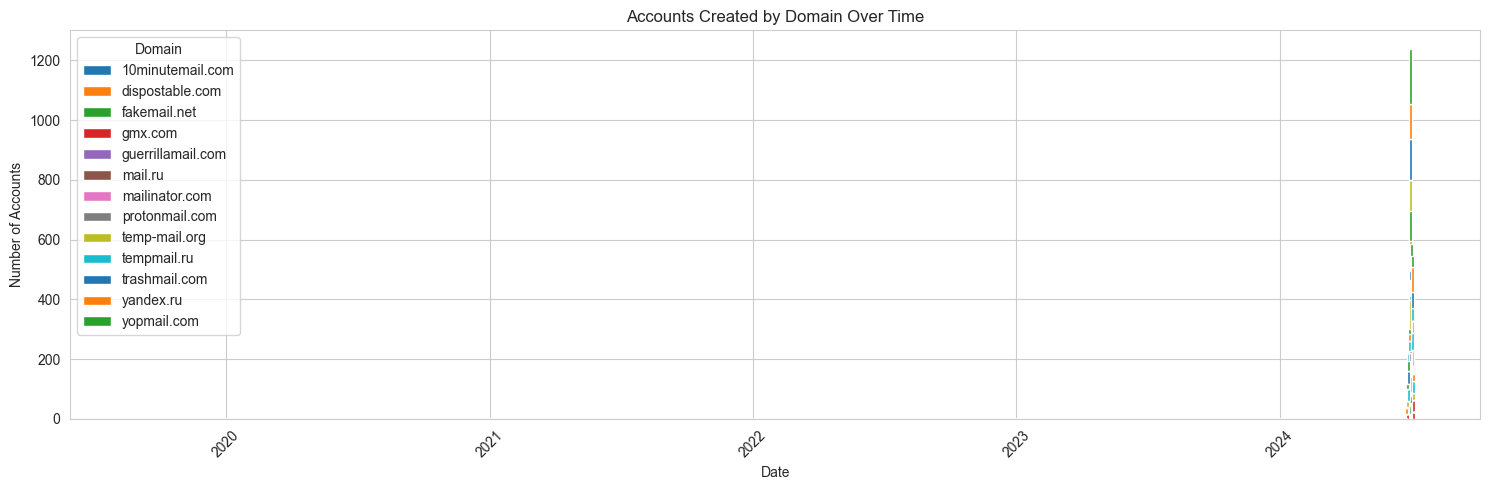

In [94]:
fig = plt.figure(figsize = (15,5))
bottom_height = np.zeros(len(dates))
for dom in domains:
    if dom in rare_emails:
        height = gp.user_email[dom]
        plt.bar(dates, height=height, width=4, bottom=bottom_height, label=dom)
        bottom_height += height

plt.title("Accounts Created by Domain Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Accounts")
plt.legend(title="Domain")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
gp = data[['user_email']].groupby([data.account_creation_date,data.email_domain]).count().unstack(fill_value=0)
gp

In [98]:
sus_emails = data[~data.email_domain.isin(['gmail.com','yahoo.com','hotmail.com'])]
sus_emails['asn'].groupby(sus_emails.asn).count()

asn
AS45595     222
AS7018     2366
AS7922      761
AS9299     1085
Name: asn, dtype: int64

AS4837 - China Unicom (CN), 346k Hosted Domains
AS7922 - Comcast cables (US), 110k hosted domains
AS22773 - Cox COmmunication (US), 43k hosted domains
AS7018 - AT&T (US), 42k hosted Domains
AS3352 - Telefonic De Espana (SP), 37k Hosted Domains
AS2856 - British Telecom (US), 30k Hosted Domains
AS3269 - Telecom Italia (IT), 14k Hosted Domains
AS9299 - Philippine Long Distance (PH), 1600 Hosted Domains
AS45595 - Pakistan Telecom (PK), Hosted Domains

In [99]:
data

,timestamp,user_id,user_email,account_creation_date,subscription_status,account_tier,path,http_method,ip,org,asn,country,cookie,device_fingerprint,user_agent,browser_family,os_family,account_balance,user_features
0,1719792948,U747868,znguyen@yahoo.com,2020-09-08,paid,listener,/artist/A000872/song/S000058/song_details,GET,12.0.0.18,"AT&T Services, Inc.",AS7018,United States,afadea9349dccbd61d45ab08b0e9c5b5,ea7c091f8b471d08d7e433c1d1bd2683,Mozilla/5.0 (Windows NT 10.0; rv:120.0) Gecko/...,Firefox,Windows,0.000000,"{""device_fingerprint"": {""value"": ""ea7c091f8b47..."
1,1719793128,U747868,znguyen@yahoo.com,2020-09-08,paid,listener,/artist/A000675/song/S000071/rate,POST,12.0.0.18,"AT&T Services, Inc.",AS7018,United States,afadea9349dccbd61d45ab08b0e9c5b5,ea7c091f8b471d08d7e433c1d1bd2683,Mozilla/5.0 (Windows NT 10.0; rv:120.0) Gecko/...,Firefox,Windows,0.000000,"{""device_fingerprint"": {""value"": ""ea7c091f8b47..."
2,1719793309,U747868,znguyen@yahoo.com,2020-09-08,paid,listener,/user/U747868/recommendations,GET,12.0.0.18,"AT&T Services, Inc.",AS7018,United States,afadea9349dccbd61d45ab08b0e9c5b5,ea7c091f8b471d08d7e433c1d1bd2683,Mozilla/5.0 (Windows NT 10.0; rv:120.0) Gecko/...,Firefox,Windows,0.000000,"{""device_fingerprint"": {""value"": ""ea7c091f8b47..."
3,1719793323,U747868,znguyen@yahoo.com,2020-09-08,paid,listener,/search,GET,12.0.0.18,"AT&T Services, Inc.",AS7018,United States,afadea9349dccbd61d45ab08b0e9c5b5,ea7c091f8b471d08d7e433c1d1bd2683,Mozilla/5.0 (Windows NT 10.0; rv:120.0) Gecko/...,Firefox,Windows,0.000000,"{""device_fingerprint"": {""value"": ""ea7c091f8b47..."
4,1719793468,U747868,znguyen@yahoo.com,2020-09-08,paid,listener,/artist/A000179/song/S000120/pause,POST,12.0.0.18,"AT&T Services, Inc.",AS7018,United States,afadea9349dccbd61d45ab08b0e9c5b5,ea7c091f8b471d08d7e433c1d1bd2683,Mozilla/5.0 (Windows NT 10.0; rv:120.0) Gecko/...,Firefox,Windows,0.000000,"{""device_fingerprint"": {""value"": ""ea7c091f8b47..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93640,1720396623,U632599,wmaxwell@gmail.com,2020-07-20,paid,listener,/artist/A000700/subscribe,POST,73.0.0.76,"Comcast Cable Communications, LLC",AS7922,United States,6f89597676dfc9a090f91b661fafa494,ae99512a04ca263a7f8e5de5ac4cba5a,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,Edge,Linux,0.000000,"{""device_fingerprint"": {""value"": ""ae99512a04ca..."
93641,1720396775,U632599,wmaxwell@gmail.com,2020-07-20,paid,listener,/artist/A000251/like,POST,73.0.0.76,"Comcast Cable Communications, LLC",AS7922,United States,6f89597676dfc9a090f91b661fafa494,ae99512a04ca263a7f8e5de5ac4cba5a,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,Edge,Linux,0.000000,"{""device_fingerprint"": {""value"": ""ae99512a04ca..."
93642,1720415285,U651065,michellerodriguez@hotmail.com,2021-05-12,paid,artist,/homepage,GET,73.0.0.100,"Comcast Cable Communications, LLC",AS7922,United States,32cb902aaf374867c9b0f23a9b0d6dfa,57b23f4ccf6104186afd60506778fa7b,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,Edge,Linux,0.000000,"{""device_fingerprint"": {""value"": ""57b23f4ccf61..."
93643,1720439541,U445622,mary78@hotmail.com,2022-05-10,paid,artist,/send_to/U121157/send_message,POST,111.0.0.55,CNCGROUP China169 Backbone,AS4837,China,6de19499161f9da71032f40b8dd63eb1,a727a46367abffa9305f2a958af8f0bf,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,Edge,Linux,13082.097258,"{""device_fingerprint"": {""value"": ""a727a46367ab..."


In [114]:
multiple_account_devices = data['user_email'].groupby(data.device_fingerprint).nunique().sort_values()
multiple_account_devices = multiple_account_devices[multiple_account_devices > 5]
multiple_account_devices

device_fingerprint
60a9aefaa6b888820470525a99007dfc     6
25be44b82c681a0f307f1e8b515434b8     6
b67898c814810ab803f2e5a89ad6248d     7
0790af04f1f451a6766c267d97c29f3a     7
0a6c6e428829a7139371e2fdf15f93fc     7
d36b51c5363b76d5836a7ca493ede7c8     9
b6facbc9381f478d4d30b5f15e25a022    10
a457fa7c6030acebd74005cdf9945348    11
dcc3617c88730449a7cf341cd075f098    11
7bbaac2d64f335fb9f608dfb66da0acc    13
5b31a71114b79e82228b30964a8aa90e    13
6c23cc5f5e916b31f8cacba1f9260bda    14
437abaf9b3e2f2e2a60cf9a6fd642b90    15
a727a46367abffa9305f2a958af8f0bf    16
57b23f4ccf6104186afd60506778fa7b    21
Name: user_email, dtype: int64

In [115]:
data[data.device_fingerprint.isin(multiple_account_devices.index)]

,timestamp,user_id,user_email,account_creation_date,subscription_status,account_tier,path,http_method,ip,org,asn,country,cookie,device_fingerprint,user_agent,browser_family,os_family,account_balance,user_features,command
314,1719853245,U772698,traciunderwood@gmail.com,2022-09-05,paid,artist,/user/U772698/personal_details,GET,111.0.0.6,CNCGROUP China169 Backbone,AS4837,China,6de19499161f9da71032f40b8dd63eb1,a727a46367abffa9305f2a958af8f0bf,Mozilla/5.0 (Windows NT 10.0; rv:120.0) Gecko/...,Firefox,Windows,13707.770773,"{""device_fingerprint"": {""value"": ""a727a46367ab...",personal_details
315,1719853291,U772698,traciunderwood@gmail.com,2022-09-05,paid,artist,/user/U772698/security/change_password,POST,111.0.0.6,CNCGROUP China169 Backbone,AS4837,China,6de19499161f9da71032f40b8dd63eb1,a727a46367abffa9305f2a958af8f0bf,Mozilla/5.0 (Windows NT 10.0; rv:120.0) Gecko/...,Firefox,Windows,13707.770773,"{""device_fingerprint"": {""value"": ""a727a46367ab...",change_password
317,1719853561,U772698,traciunderwood@gmail.com,2022-09-05,paid,artist,/user/U772698/security/disable_mfa,POST,111.0.0.6,CNCGROUP China169 Backbone,AS4837,China,6de19499161f9da71032f40b8dd63eb1,a727a46367abffa9305f2a958af8f0bf,Mozilla/5.0 (Windows NT 10.0; rv:120.0) Gecko/...,Firefox,Windows,13707.770773,"{""device_fingerprint"": {""value"": ""a727a46367ab...",disable_mfa
318,1719853584,U772698,traciunderwood@gmail.com,2022-09-05,paid,artist,/send_to/U814351/send_message,POST,111.0.0.6,CNCGROUP China169 Backbone,AS4837,China,6de19499161f9da71032f40b8dd63eb1,a727a46367abffa9305f2a958af8f0bf,Mozilla/5.0 (Windows NT 10.0; rv:120.0) Gecko/...,Firefox,Windows,13707.770773,"{""device_fingerprint"": {""value"": ""a727a46367ab...",send_message
319,1719853769,U772698,traciunderwood@gmail.com,2022-09-05,paid,artist,/send_to/U215441/send_message,POST,111.0.0.6,CNCGROUP China169 Backbone,AS4837,China,6de19499161f9da71032f40b8dd63eb1,a727a46367abffa9305f2a958af8f0bf,Mozilla/5.0 (Windows NT 10.0; rv:120.0) Gecko/...,Firefox,Windows,13707.770773,"{""device_fingerprint"": {""value"": ""a727a46367ab...",send_message
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93342,1720363942,U880812,kcarney@yahoo.com,2023-01-26,paid,artist,/user/U880812/security/change_password,POST,182.0.0.55,Pakistan Telecom Company Limited,AS45595,Pakistan,32cb902aaf374867c9b0f23a9b0d6dfa,57b23f4ccf6104186afd60506778fa7b,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,Edge,Linux,11766.071398,"{""device_fingerprint"": {""value"": ""57b23f4ccf61...",change_password
93558,1720387852,U741536,rhodescassidy@hotmail.com,2021-10-23,paid,artist,/send_to/U010362/send_message,POST,120.0.0.2,Philippine Long Distance Telephone Company,AS9299,Philippines,6de19499161f9da71032f40b8dd63eb1,a727a46367abffa9305f2a958af8f0bf,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,Edge,Linux,4993.209918,"{""device_fingerprint"": {""value"": ""a727a46367ab...",send_message
93642,1720415285,U651065,michellerodriguez@hotmail.com,2021-05-12,paid,artist,/homepage,GET,73.0.0.100,"Comcast Cable Communications, LLC",AS7922,United States,32cb902aaf374867c9b0f23a9b0d6dfa,57b23f4ccf6104186afd60506778fa7b,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,Edge,Linux,0.000000,"{""device_fingerprint"": {""value"": ""57b23f4ccf61...",homepage
93643,1720439541,U445622,mary78@hotmail.com,2022-05-10,paid,artist,/send_to/U121157/send_message,POST,111.0.0.55,CNCGROUP China169 Backbone,AS4837,China,6de19499161f9da71032f40b8dd63eb1,a727a46367abffa9305f2a958af8f0bf,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,Edge,Linux,13082.097258,"{""device_fingerprint"": {""value"": ""a727a46367ab...",send_message


In [104]:
multiple_account_cookies = data['user_email'].groupby(data.cookie).nunique().sort_values()
multiple_account_cookies[multiple_account_cookies > 5]

cookie
92f6a65752332fc6e90dcd4af7457fd7     6
233ccf27c247ec694fbb7b3cb94cf849     7
baff2461b2e0023044b86409fbaf95ad     7
39c820d96400d68133c6cdc89b510210     8
5c887169d0d17b3a65b86fb6ba9a47bc    10
a11a3a34b1d68ebe53474a19fe6fdef6    11
3d4b68a542d2a96c067806ff026e4b99    12
9018f5d85ecf8185385f99cab02d48f7    13
6de19499161f9da71032f40b8dd63eb1    15
32cb902aaf374867c9b0f23a9b0d6dfa    20
Name: user_email, dtype: int64

In [105]:
data['command'] = data['path'].apply(lambda x: x.split('/')[-1])
data.command.value_counts()

command
play                        6913
pause                       6897
recommendations             6557
skip                        6513
search                      6492
rate                        6422
homepage                    6120
review                      6044
song_details                6012
unsubscribe                 5933
view_playlist               5926
like                        5908
subscribe                   5899
send_message                3376
add_comment                 3350
download_lyrics             3028
add_payment_method           385
update_payment_methods       371
see_balance                  267
disable_mfa                  183
personal_details             159
reset_password               138
update_profile               136
change_withdrawal_method     134
artist_dashboard             127
withdraw_balance             120
add_to_cart                   73
change_password               58
download_info                 13
view_full_info                13
su

In [110]:
class Commands:
    sus = ['disable_mfa',
            'change_withdrawal_method',
            'withdraw_balance',
            'change_password',
            'change_shipping_address'
            ]

    strange = ['A520311',
                    'A121720',
                    'AL411722',
                    'AL525793',
                    'AL634586',
                    'AL143326',
                    'AL356613',
                    'A409478',
                    'AL531011',
                    'A762816',
                    'AL283235',
                    'A783696',
                    'A035765',
                    'AL274308',
                    'AL748975',
                    'AL825739',
                    ]
    
    withdraw = ['withdraw_funds']
COMMANDS = Commands()

In [111]:
data[data.command.isin(COMMANDS.strange)]

,timestamp,user_id,user_email,account_creation_date,subscription_status,account_tier,path,http_method,ip,org,asn,country,cookie,device_fingerprint,user_agent,browser_family,os_family,account_balance,user_features,command
12133,1720169615,U744743,emily63@gmail.com,2021-12-14,paid,listener,/artist/A520311,POST,120.0.0.69,Philippine Long Distance Telephone Company,AS9299,Philippines,5c887169d0d17b3a65b86fb6ba9a47bc,b6facbc9381f478d4d30b5f15e25a022,Mozilla/5.0 (X11; Linux x86_64; rv:120.0) Geck...,Firefox,Linux,0.0,"{""device_fingerprint"": {""value"": ""b6facbc9381f...",A520311
21105,1720049119,U168598,ejuarez@gmail.com,2021-11-22,paid,listener,/artist/A160965/album/AL748975,POST,182.0.0.46,Pakistan Telecom Company Limited,AS45595,Pakistan,5c887169d0d17b3a65b86fb6ba9a47bc,b6facbc9381f478d4d30b5f15e25a022,Mozilla/5.0 (Windows NT 10.0) AppleWebKit/605....,Safari,Windows,0.0,"{""device_fingerprint"": {""value"": ""b6facbc9381f...",AL748975
21106,1720049136,U168598,ejuarez@gmail.com,2021-11-22,paid,listener,/artist/A236926/album/AL274308,POST,182.0.0.46,Pakistan Telecom Company Limited,AS45595,Pakistan,5c887169d0d17b3a65b86fb6ba9a47bc,b6facbc9381f478d4d30b5f15e25a022,Mozilla/5.0 (Windows NT 10.0) AppleWebKit/605....,Safari,Windows,0.0,"{""device_fingerprint"": {""value"": ""b6facbc9381f...",AL274308
21874,1720178339,U368556,annbradshaw@hotmail.com,2021-09-11,paid,listener,/artist/A035765,POST,120.0.0.35,Philippine Long Distance Telephone Company,AS9299,Philippines,5c887169d0d17b3a65b86fb6ba9a47bc,b6facbc9381f478d4d30b5f15e25a022,Mozilla/5.0 (Windows NT 10.0) AppleWebKit/605....,Safari,Windows,0.0,"{""device_fingerprint"": {""value"": ""b6facbc9381f...",A035765
26568,1720336425,U994777,sperez@yahoo.com,2020-12-25,paid,listener,/artist/A783696,POST,88.0.0.85,Telefonica de Espana,AS3352,Spain,5c887169d0d17b3a65b86fb6ba9a47bc,b6facbc9381f478d4d30b5f15e25a022,Mozilla/5.0 (Windows NT 11.0) AppleWebKit/537....,Chrome,Windows,0.0,"{""device_fingerprint"": {""value"": ""b6facbc9381f...",A783696
28451,1720034884,U164867,qlittle@yahoo.com,2021-04-24,paid,listener,/artist/A392158/album/AL283235,POST,182.0.0.73,Pakistan Telecom Company Limited,AS45595,Pakistan,5c887169d0d17b3a65b86fb6ba9a47bc,b6facbc9381f478d4d30b5f15e25a022,Mozilla/5.0 (Windows NT 11.0) AppleWebKit/605....,Safari,Windows,0.0,"{""device_fingerprint"": {""value"": ""b6facbc9381f...",AL283235
28452,1720034884,U164867,qlittle@yahoo.com,2021-04-24,paid,listener,/artist/A762816,POST,182.0.0.73,Pakistan Telecom Company Limited,AS45595,Pakistan,5c887169d0d17b3a65b86fb6ba9a47bc,b6facbc9381f478d4d30b5f15e25a022,Mozilla/5.0 (Windows NT 11.0) AppleWebKit/605....,Safari,Windows,0.0,"{""device_fingerprint"": {""value"": ""b6facbc9381f...",A762816
28453,1720034907,U164867,qlittle@yahoo.com,2021-04-24,paid,listener,/artist/A001929/album/AL531011,POST,182.0.0.73,Pakistan Telecom Company Limited,AS45595,Pakistan,5c887169d0d17b3a65b86fb6ba9a47bc,b6facbc9381f478d4d30b5f15e25a022,Mozilla/5.0 (Windows NT 11.0) AppleWebKit/605....,Safari,Windows,0.0,"{""device_fingerprint"": {""value"": ""b6facbc9381f...",AL531011
43945,1720158850,U438102,yschmidt@gmail.com,2021-08-07,paid,listener,/artist/A409478,POST,88.0.0.42,Telefonica de Espana,AS3352,Spain,5c887169d0d17b3a65b86fb6ba9a47bc,b6facbc9381f478d4d30b5f15e25a022,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/60...,Safari,Linux,0.0,"{""device_fingerprint"": {""value"": ""b6facbc9381f...",A409478
59774,1720175460,U671439,jeffhayden@gmail.com,2022-02-18,paid,listener,/artist/A613517/album/AL356613,POST,120.0.0.87,Philippine Long Distance Telephone Company,AS9299,Philippines,5c887169d0d17b3a65b86fb6ba9a47bc,b6facbc9381f478d4d30b5f15e25a022,Mozilla/5.0 (Macintosh; Intel Mac OS X 11_0) A...,Safari,Mac OS X,0.0,"{""device_fingerprint"": {""value"": ""b6facbc9381f...",AL356613


In [112]:
data[data.command.isin(COMMANDS.sus)][data.account_balance > 0]

/var/folders/ms/zw030byx3qsfvlvyyfnnr7sm0000gn/T/ipykernel_13367/2189294466.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data.command.isin(COMMANDS.sus)][data.account_balance > 0]


,timestamp,user_id,user_email,account_creation_date,subscription_status,account_tier,path,http_method,ip,org,asn,country,cookie,device_fingerprint,user_agent,browser_family,os_family,account_balance,user_features,command
315,1719853291,U772698,traciunderwood@gmail.com,2022-09-05,paid,artist,/user/U772698/security/change_password,POST,111.0.0.6,CNCGROUP China169 Backbone,AS4837,China,6de19499161f9da71032f40b8dd63eb1,a727a46367abffa9305f2a958af8f0bf,Mozilla/5.0 (Windows NT 10.0; rv:120.0) Gecko/...,Firefox,Windows,13707.770773,"{""device_fingerprint"": {""value"": ""a727a46367ab...",change_password
317,1719853561,U772698,traciunderwood@gmail.com,2022-09-05,paid,artist,/user/U772698/security/disable_mfa,POST,111.0.0.6,CNCGROUP China169 Backbone,AS4837,China,6de19499161f9da71032f40b8dd63eb1,a727a46367abffa9305f2a958af8f0bf,Mozilla/5.0 (Windows NT 10.0; rv:120.0) Gecko/...,Firefox,Windows,13707.770773,"{""device_fingerprint"": {""value"": ""a727a46367ab...",disable_mfa
477,1719872051,U038703,stephanie90@gmail.com,2023-05-19,paid,artist,/user/U038703/security/change_password,POST,120.0.0.18,Philippine Long Distance Telephone Company,AS9299,Philippines,6de19499161f9da71032f40b8dd63eb1,a727a46367abffa9305f2a958af8f0bf,Mozilla/5.0 (Windows NT 10.0; rv:120.0) Gecko/...,Firefox,Windows,5974.964908,"{""device_fingerprint"": {""value"": ""a727a46367ab...",change_password
478,1719872056,U038703,stephanie90@gmail.com,2023-05-19,paid,artist,/user/U038703/security/disable_mfa,POST,120.0.0.18,Philippine Long Distance Telephone Company,AS9299,Philippines,6de19499161f9da71032f40b8dd63eb1,a727a46367abffa9305f2a958af8f0bf,Mozilla/5.0 (Windows NT 10.0; rv:120.0) Gecko/...,Firefox,Windows,5974.964908,"{""device_fingerprint"": {""value"": ""a727a46367ab...",disable_mfa
1822,1720078964,U972095,martinstephanie@yahoo.com,2022-04-12,paid,artist,/user/U972095/withdraw_balance,POST,12.0.0.29,"AT&T Services, Inc.",AS7018,United States,bfbe5b43f60e118da70bf29c35957e7e,8a0ecd68836b7062833ab74dd6f2ca48,Mozilla/5.0 (Windows NT 10.0; rv:120.0) Gecko/...,Firefox,Windows,78.198260,"{""device_fingerprint"": {""value"": ""8a0ecd68836b...",withdraw_balance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92887,1720332916,U395490,boydmichael@hotmail.com,2020-08-21,paid,artist,/change_withdrawal_method,POST,217.0.0.24,British Telecommunications PLC,AS2856,United Kingdom,ac103bf61987e8b96abd4a01378b2c32,2959ff433d899707685e21d8bcdc3e31,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,Edge,Linux,3282.543864,"{""device_fingerprint"": {""value"": ""2959ff433d89...",change_withdrawal_method
92888,1720333179,U395490,boydmichael@hotmail.com,2020-08-21,paid,artist,/change_withdrawal_method,POST,217.0.0.24,British Telecommunications PLC,AS2856,United Kingdom,ac103bf61987e8b96abd4a01378b2c32,2959ff433d899707685e21d8bcdc3e31,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,Edge,Linux,3282.543864,"{""device_fingerprint"": {""value"": ""2959ff433d89...",change_withdrawal_method
92890,1720333217,U395490,boydmichael@hotmail.com,2020-08-21,paid,artist,/change_withdrawal_method,POST,217.0.0.24,British Telecommunications PLC,AS2856,United Kingdom,ac103bf61987e8b96abd4a01378b2c32,2959ff433d899707685e21d8bcdc3e31,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,Edge,Linux,3282.543864,"{""device_fingerprint"": {""value"": ""2959ff433d89...",change_withdrawal_method
93342,1720363942,U880812,kcarney@yahoo.com,2023-01-26,paid,artist,/user/U880812/security/change_password,POST,182.0.0.55,Pakistan Telecom Company Limited,AS45595,Pakistan,32cb902aaf374867c9b0f23a9b0d6dfa,57b23f4ccf6104186afd60506778fa7b,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,Edge,Linux,11766.071398,"{""device_fingerprint"": {""value"": ""57b23f4ccf61...",change_password


In [121]:
import json

In [122]:
t = json.loads(data.iloc[0].user_features)
t

{'device_fingerprint': {'value': 'ea7c091f8b471d08d7e433c1d1bd2683',
  'age': 591},
 'cookie': {'value': 'afadea9349dccbd61d45ab08b0e9c5b5', 'age': 307},
 'country': {'value': 'United States', 'age': 626},
 'org': {'value': 'AT&T Services, Inc.', 'age': 691},
 'user_agent': {'value': 'Mozilla/5.0 (Windows NT 10.0; rv:120.0) Gecko/20100101 Firefox/120.0',
  'age': 288},
 'browser_family': {'value': 'Firefox', 'age': 288},
 'os_family': {'value': 'Windows', 'age': 288},
 'ip': {'value': '12.0.0.18', 'age': 30}}

In [126]:
def extract_user_features(user_feaures):
    user_feaures = json.loads(user_feaures)

    device_age = user_feaures['device_fingerprint']['age']
    cookie_age = user_feaures['cookie']['age']
    country = user_feaures['country']['value']
    country_age = user_feaures['country']['age']
    asn_age = user_feaures['org']['age']
    ua_age = user_feaures['user_agent']['age']
    browser_age = user_feaures['browser_family']['age']
    os_age = user_feaures['os_family']['age']
    ip_age = user_feaures['ip']['age']

    return [device_age,
            cookie_age,
            country,
            country_age,
            asn_age,
            ua_age,
            browser_age,
            os_age,
            ip_age]

In [128]:
data['age'] = data.user_features.apply(lambda x: extract_user_features(x))
age = pd.DataFrame(data['age'].tolist(), columns=['device_age', 
                                                  'cookie_age', 
                                                  'country',
                                                  'country_age',
                                                  'asn_age',
                                                  'ua_age',
                                                  'browser_age',
                                                  'os_age',
                                                  'ip_age'])
data = pd.concat([data.drop(columns=['age']), age], axis=1)
data


,timestamp,user_id,user_email,account_creation_date,subscription_status,account_tier,path,http_method,ip,org,...,command,device_age,cookie_age,country,country_age,asn_age,ua_age,browser_age,os_age,ip_age
0,1719792948,U747868,znguyen@yahoo.com,2020-09-08,paid,listener,/artist/A000872/song/S000058/song_details,GET,12.0.0.18,"AT&T Services, Inc.",...,song_details,591,307,United States,626,691,288,288,288,30
1,1719793128,U747868,znguyen@yahoo.com,2020-09-08,paid,listener,/artist/A000675/song/S000071/rate,POST,12.0.0.18,"AT&T Services, Inc.",...,rate,591,307,United States,626,691,288,288,288,30
2,1719793309,U747868,znguyen@yahoo.com,2020-09-08,paid,listener,/user/U747868/recommendations,GET,12.0.0.18,"AT&T Services, Inc.",...,recommendations,591,307,United States,626,691,288,288,288,30
3,1719793323,U747868,znguyen@yahoo.com,2020-09-08,paid,listener,/search,GET,12.0.0.18,"AT&T Services, Inc.",...,search,591,307,United States,626,691,288,288,288,30
4,1719793468,U747868,znguyen@yahoo.com,2020-09-08,paid,listener,/artist/A000179/song/S000120/pause,POST,12.0.0.18,"AT&T Services, Inc.",...,pause,591,307,United States,626,691,288,288,288,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93640,1720396623,U632599,wmaxwell@gmail.com,2020-07-20,paid,listener,/artist/A000700/subscribe,POST,73.0.0.76,"Comcast Cable Communications, LLC",...,subscribe,678,865,United States,738,184,721,721,721,184
93641,1720396775,U632599,wmaxwell@gmail.com,2020-07-20,paid,listener,/artist/A000251/like,POST,73.0.0.76,"Comcast Cable Communications, LLC",...,like,678,865,United States,738,184,721,721,721,184
93642,1720415285,U651065,michellerodriguez@hotmail.com,2021-05-12,paid,artist,/homepage,GET,73.0.0.100,"Comcast Cable Communications, LLC",...,homepage,1,1,United States,0,0,0,0,0,0
93643,1720439541,U445622,mary78@hotmail.com,2022-05-10,paid,artist,/send_to/U121157/send_message,POST,111.0.0.55,CNCGROUP China169 Backbone,...,send_message,1,0,China,1,1,0,0,0,1


In [12]:
cks = data[~data.subscription_status.eq('paid')]['user_id'].groupby(data.cookie).nunique().sort_values()
cks

cookie
024c6d9e4c8ac1233a309c378654e6b3     1
b4553f639fc261fd3ae73d3cf68930de     1
a9ca5220742cf3ffc1c20e9bf326677b     1
a815820804fa6525f97d4ca8dc2246fc     1
a6e8d3da249a9d7cf7b6f9f16ba56e78     1
                                    ..
233ccf27c247ec694fbb7b3cb94cf849     7
baff2461b2e0023044b86409fbaf95ad     7
39c820d96400d68133c6cdc89b510210     8
a11a3a34b1d68ebe53474a19fe6fdef6    11
3d4b68a542d2a96c067806ff026e4b99    12
Name: user_id, Length: 80, dtype: int64

In [13]:
sus_cks = cks[cks>2]
sus_cks

cookie
c0db5db5d91174cacf05ee6b3f7f6414     3
5ae63cada6380d281513ede51a892d49     3
cf332e89d0315df2f8f79ceb42c361fb     4
76fca35fedbf99ee3e2f609bc40ae9ce     4
56c426d56caf22efeaa6f65c29c8c0a9     4
370709f85845897bc7d0ca2e3f4defa9     4
aa5211f460591fea2e027aa14a9170db     4
3ad837e4a0357a513869bdd67a944393     4
be451e6375482926fa57960290912c47     4
2e9e8544e6590bdca5f26fdcc311892e     5
82b4242fef08c1f470a79b912da5d1d1     5
40b3ae6092bd5fd690c7c07270f7abe1     5
92f6a65752332fc6e90dcd4af7457fd7     6
233ccf27c247ec694fbb7b3cb94cf849     7
baff2461b2e0023044b86409fbaf95ad     7
39c820d96400d68133c6cdc89b510210     8
a11a3a34b1d68ebe53474a19fe6fdef6    11
3d4b68a542d2a96c067806ff026e4b99    12
Name: user_id, dtype: int64

In [14]:
data[data.cookie.isin(sus_cks.index)]

,timestamp,user_id,user_email,account_creation_date,subscription_status,account_tier,path,http_method,ip,org,...,command,device_age,cookie_age,country.1,country_age,asn_age,ua_age,browser_age,os_age,ip_age
30598,2024-07-01 02:31:12,U546189,uthornton@dispostable.com,2024-07-01,trial,listener,/artist/A000029/song/S000056/pause,POST,12.0.0.82,"AT&T Services, Inc.",...,pause,1,0,United States,1,1,0,0,0,0
30599,2024-07-01 02:32:02,U546189,uthornton@dispostable.com,2024-07-01,trial,listener,/user/U546189/recommendations,GET,12.0.0.82,"AT&T Services, Inc.",...,recommendations,0,0,United States,0,0,0,0,0,0
30600,2024-07-01 02:33:06,U546189,uthornton@dispostable.com,2024-07-01,trial,listener,/artist/A000029/song/S000056/play,POST,12.0.0.82,"AT&T Services, Inc.",...,play,0,0,United States,0,0,0,0,0,0
30602,2024-07-01 02:36:40,U546189,uthornton@dispostable.com,2024-07-01,trial,listener,/artist/A000029/song/S000056/pause,POST,12.0.0.82,"AT&T Services, Inc.",...,pause,0,0,United States,0,0,0,0,0,0
30603,2024-07-01 02:36:54,U546189,uthornton@dispostable.com,2024-07-01,trial,listener,/artist/A000029/song/S000056/skip,POST,12.0.0.82,"AT&T Services, Inc.",...,skip,0,0,United States,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62952,2024-07-07 23:37:08,U895065,john73@guerrillamail.com,2024-07-02,trial,listener,/artist/A000360/song/S000094/add_comment,POST,120.0.0.56,Philippine Long Distance Telephone Company,...,add_comment,123,123,Philippines,123,123,123,123,123,123
62953,2024-07-07 23:41:08,U895065,john73@guerrillamail.com,2024-07-02,trial,listener,/artist/A000360/song/S000095/rate,POST,120.0.0.56,Philippine Long Distance Telephone Company,...,rate,123,123,Philippines,123,123,123,123,123,123
62956,2024-07-07 23:43:22,U895065,john73@guerrillamail.com,2024-07-02,trial,listener,/artist/A000360/song/S000080/pause,POST,120.0.0.56,Philippine Long Distance Telephone Company,...,pause,123,123,Philippines,123,123,123,123,123,123
62963,2024-07-07 23:50:21,U895065,john73@guerrillamail.com,2024-07-02,trial,listener,/artist/A000360/song/S000094/rate,POST,120.0.0.56,Philippine Long Distance Telephone Company,...,rate,123,123,Philippines,123,123,123,123,123,123


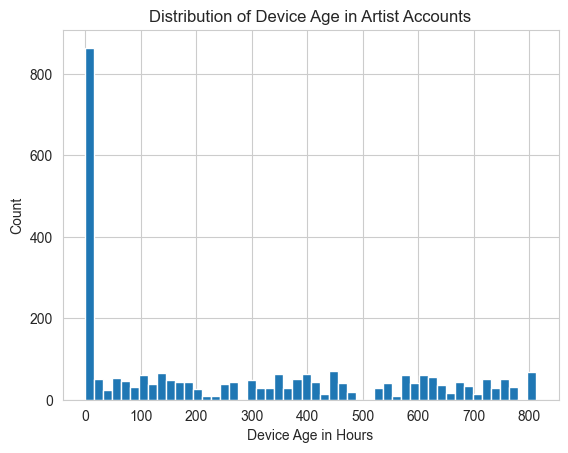

In [25]:
artists_device_age = data[data.account_tier.eq('artist')]['device_age']
plt.hist(artists_device_age,bins=50)
plt.title('Distribution of Device Age in Artist Accounts')
plt.ylabel('Count')
plt.xlabel('Device Age in Hours')
plt.show()

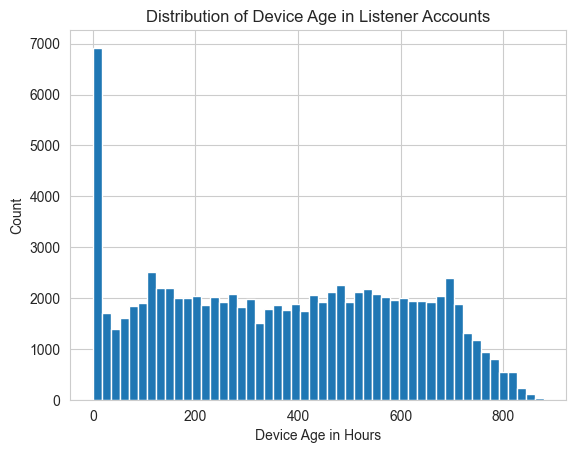

In [26]:
listener_device_age = data[data.account_tier.eq('listener')]['device_age']
plt.hist(listener_device_age,bins=50)
plt.title('Distribution of Device Age in Listener Accounts')
plt.ylabel('Count')
plt.xlabel('Device Age in Hours')
plt.show()

In [31]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['account_creation_date'] = pd.to_datetime(data['account_creation_date'])
data['account_age_in_hours'] = (data['timestamp'] - data['account_creation_date']).dt.total_seconds() / 3600
data['account_age_in_hours']

0        33408.263333
1        33408.313333
2        33408.363611
3        33408.367500
4        33408.407778
             ...     
93640    34775.950833
93641    34775.993056
93642    27677.134722
93643    18971.872500
93644    10792.707778
Name: account_age_in_hours, Length: 93645, dtype: float64

(array([172.,   0.,   0.,  11.,   0.,  82.,  37.,  16.,   0.,   0.,  27.,
         18., 117., 116.,  32., 121.,  35.,  27.,  77.,  37., 122.,  45.,
        103., 110., 162.,  14.,   0.,  98., 115., 178., 127.,  44.,  40.,
         91.,  70.,   0.,  76.,  13.,   0.,  11.,  76.,  47.,  62.,  24.,
          0.,  28.,   0.,   0.,   0.,  86.]),
 array([8.75583333e+00, 8.03493267e+02, 1.59823070e+03, 2.39296813e+03,
        3.18770557e+03, 3.98244300e+03, 4.77718043e+03, 5.57191787e+03,
        6.36665530e+03, 7.16139273e+03, 7.95613017e+03, 8.75086760e+03,
        9.54560503e+03, 1.03403425e+04, 1.11350799e+04, 1.19298173e+04,
        1.27245548e+04, 1.35192922e+04, 1.43140296e+04, 1.51087671e+04,
        1.59035045e+04, 1.66982419e+04, 1.74929794e+04, 1.82877168e+04,
        1.90824542e+04, 1.98771917e+04, 2.06719291e+04, 2.14666665e+04,
        2.22614040e+04, 2.30561414e+04, 2.38508788e+04, 2.46456163e+04,
        2.54403537e+04, 2.62350911e+04, 2.70298286e+04, 2.78245660e+04,
        2.

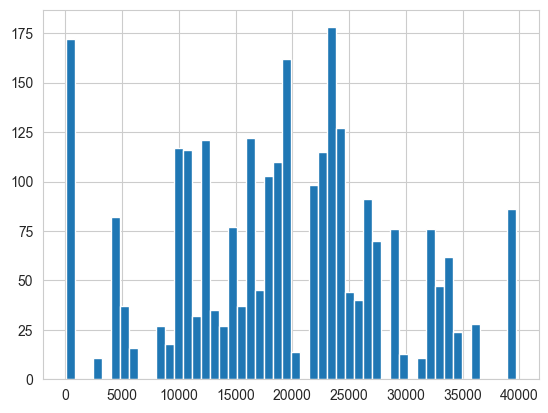

In [36]:
plt.hist(data[data.account_tier.eq('artist')]['account_age_in_hours'],bins=50)

/var/folders/ms/zw030byx3qsfvlvyyfnnr7sm0000gn/T/ipykernel_23701/89847605.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data.account_tier.eq('artist')][data.account_age_in_hours > 2400]['device_age'].hist()


<Axes: >

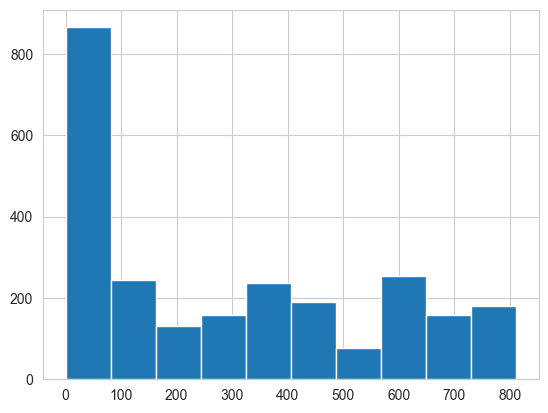

In [42]:
data[data.account_tier.eq('artist')][data.account_age_in_hours > 2400]['device_age'].hist()

/var/folders/ms/zw030byx3qsfvlvyyfnnr7sm0000gn/T/ipykernel_23701/1495004465.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data.account_tier.eq('artist')][data.account_balance > 100][data.account_age_in_hours > 2400]['device_age'].hist()
/var/folders/ms/zw030byx3qsfvlvyyfnnr7sm0000gn/T/ipykernel_23701/1495004465.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data.account_tier.eq('artist')][data.account_balance > 100][data.account_age_in_hours > 2400]['device_age'].hist()


<Axes: >

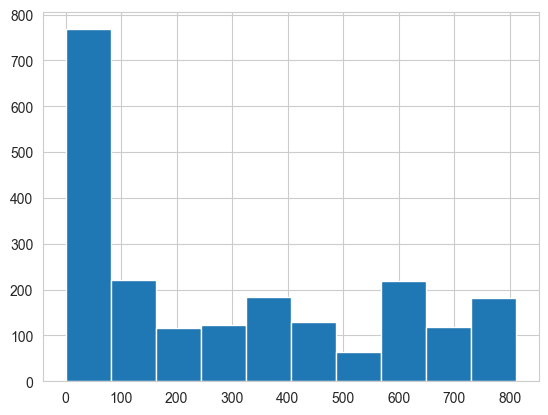

In [43]:
data[data.account_tier.eq('artist')][data.account_balance > 100][data.account_age_in_hours > 2400]['device_age'].hist()

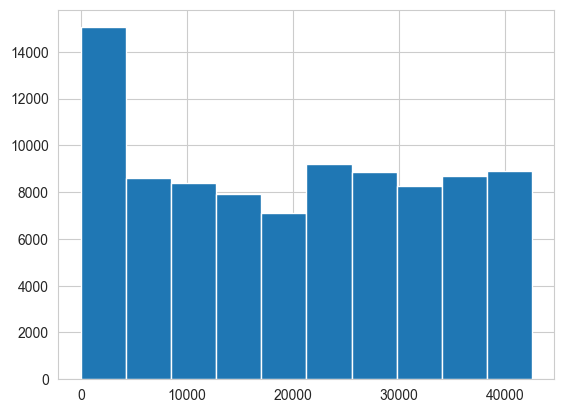

In [56]:
plt.hist(data[data.account_tier.eq('listener')]['account_age_in_hours'])
plt.show()

314              personal_details
315               change_password
317                   disable_mfa
318                  send_message
319                  send_message
                   ...           
93342             change_password
93558                send_message
93642                    homepage
93643                send_message
93644    change_withdrawal_method
Name: command, Length: 2667, dtype: object

60

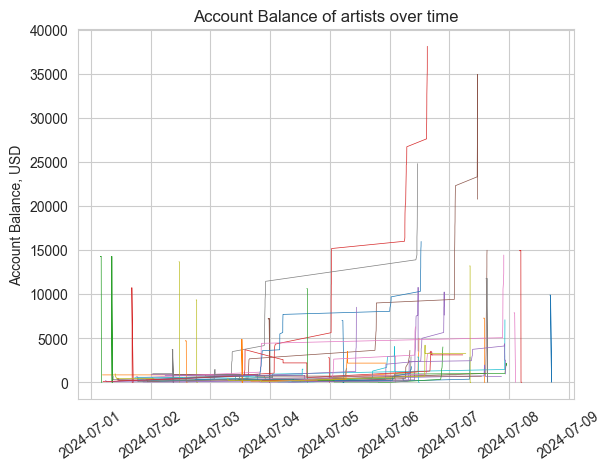

In [65]:
artists = data[data.account_tier.eq('artist')]
changed_withdraw_method = artists[artists.command.eq('change_withdrawal_method')].user_id.unique()
withdraw = artists[artists.command.eq('withdraw_balance')].user_id.unique()
artist_user_ids = artists.user_id.unique()
for a in artist_user_ids:
    df = artists[artists.user_id.eq(a)]
    if (a in changed_withdraw_method or df.account_age_in_hours.max() < 100) and a in withdraw and df.account_balance.max() > 300:
        plt.plot(df.timestamp,df.account_balance,lw=0.5)

plt.title("Account Balance of artists over time")
plt.xticks(rotation=35)
plt.ylabel("Account Balance, USD")
plt.show()

In [73]:
listeners = data[data.account_tier.eq('listener')]
listeners

,timestamp,user_id,user_email,account_creation_date,subscription_status,account_tier,path,http_method,ip,org,...,cookie_age,country.1,country_age,asn_age,ua_age,browser_age,os_age,ip_age,account_age_in_hours,date
0,2024-07-01 00:15:48,U747868,znguyen@yahoo.com,2020-09-08,paid,listener,/artist/A000872/song/S000058/song_details,GET,12.0.0.18,"AT&T Services, Inc.",...,307,United States,626,691,288,288,288,30,33408.263333,2024-07-01
1,2024-07-01 00:18:48,U747868,znguyen@yahoo.com,2020-09-08,paid,listener,/artist/A000675/song/S000071/rate,POST,12.0.0.18,"AT&T Services, Inc.",...,307,United States,626,691,288,288,288,30,33408.313333,2024-07-01
2,2024-07-01 00:21:49,U747868,znguyen@yahoo.com,2020-09-08,paid,listener,/user/U747868/recommendations,GET,12.0.0.18,"AT&T Services, Inc.",...,307,United States,626,691,288,288,288,30,33408.363611,2024-07-01
3,2024-07-01 00:22:03,U747868,znguyen@yahoo.com,2020-09-08,paid,listener,/search,GET,12.0.0.18,"AT&T Services, Inc.",...,307,United States,626,691,288,288,288,30,33408.367500,2024-07-01
4,2024-07-01 00:24:28,U747868,znguyen@yahoo.com,2020-09-08,paid,listener,/artist/A000179/song/S000120/pause,POST,12.0.0.18,"AT&T Services, Inc.",...,307,United States,626,691,288,288,288,30,33408.407778,2024-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93637,2024-07-07 23:56:24,U632599,wmaxwell@gmail.com,2020-07-20,paid,listener,/homepage,POST,73.0.0.76,"Comcast Cable Communications, LLC",...,865,United States,738,184,721,721,721,184,34775.940000,2024-07-07
93638,2024-07-07 23:56:36,U632599,wmaxwell@gmail.com,2020-07-20,paid,listener,/artist/A000700/song/S000007/review,POST,73.0.0.76,"Comcast Cable Communications, LLC",...,865,United States,738,184,721,721,721,184,34775.943333,2024-07-07
93639,2024-07-07 23:56:48,U632599,wmaxwell@gmail.com,2020-07-20,paid,listener,/view_playlist,GET,73.0.0.76,"Comcast Cable Communications, LLC",...,865,United States,738,184,721,721,721,184,34775.946667,2024-07-07
93640,2024-07-07 23:57:03,U632599,wmaxwell@gmail.com,2020-07-20,paid,listener,/artist/A000700/subscribe,POST,73.0.0.76,"Comcast Cable Communications, LLC",...,865,United States,738,184,721,721,721,184,34775.950833,2024-07-07


In [46]:
data['date'] = data.timestamp.apply(lambda x: pd.to_datetime(x).date())

In [75]:
artists.user_id.unique()

array(['U772698', 'U038703', 'U736144', 'U650933', 'U972095', 'U486984',
       'U731792', 'U600173', 'U734415', 'U557722', 'U308712', 'U181694',
       'U734312', 'U956095', 'U493261', 'U175180', 'U770286', 'U752499',
       'U217250', 'U748815', 'U919424', 'U183809', 'U959147', 'U524468',
       'U575442', 'U750775', 'U192534', 'U741536', 'U696517', 'U608375',
       'U132225', 'U155816', 'U233527', 'U369562', 'U445622', 'U866376',
       'U269290', 'U631730', 'U145168', 'U830823', 'U204274', 'U356010',
       'U294634', 'U651065', 'U826557', 'U937385', 'U865030', 'U354431',
       'U643349', 'U224257', 'U989573', 'U633407', 'U142890', 'U019517',
       'U918199', 'U124328', 'U640510', 'U058423', 'U129174', 'U064422',
       'U782372', 'U621865', 'U401248', 'U148321', 'U503309', 'U243397',
       'U847514', 'U286051', 'U545064', 'U707396', 'U892234', 'U440291',
       'U416122', 'U099019', 'U061389', 'U880812', 'U764876', 'U043078',
       'U511281', 'U467920', 'U551869', 'U879349', 

In [77]:
{'a':1}.get('b') or 0.01

0.01

In [79]:
print(data.iloc[1])

timestamp                                              2024-07-01 00:18:48
user_id                                                            U747868
user_email                                               znguyen@yahoo.com
account_creation_date                                  2020-09-08 00:00:00
subscription_status                                                   paid
account_tier                                                      listener
path                                     /artist/A000675/song/S000071/rate
http_method                                                           POST
ip                                                               12.0.0.18
org                                                    AT&T Services, Inc.
asn                                                                 AS7018
country                                                      United States
cookie                                    afadea9349dccbd61d45ab08b0e9c5b5
device_fingerprint       

In [86]:
from user_agents import parse

In [87]:
data['ua_parts'] = data['user_agent'].apply(lambda x: parse(x))
data['ua_parts']

0        PC / Windows 10 / Firefox 120.0
1        PC / Windows 10 / Firefox 120.0
2        PC / Windows 10 / Firefox 120.0
3        PC / Windows 10 / Firefox 120.0
4        PC / Windows 10 / Firefox 120.0
                      ...               
93640          PC / Linux / Edge 118.0.0
93641          PC / Linux / Edge 118.0.0
93642          PC / Linux / Edge 118.0.0
93643          PC / Linux / Edge 118.0.0
93644          PC / Linux / Edge 118.0.0
Name: ua_parts, Length: 93645, dtype: object

In [89]:
x = parse(data.user_agent.iloc[0])
dir(x)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_is_android_tablet',
 '_is_blackberry_touch_capable_device',
 'browser',
 'device',
 'get_browser',
 'get_device',
 'get_os',
 'is_bot',
 'is_email_client',
 'is_mobile',
 'is_pc',
 'is_tablet',
 'is_touch_capable',
 'os',
 'ua_string']

In [ ]:
'browser',
'device',
'get_browser',
'get_device',
'get_os',
'is_bot',
'is_email_client',
'is_mobile',
'is_pc',
'is_tablet',
'is_touch_capable',
'os',
'ua_string'

In [98]:
def unpack_user_agent(ua):
    ua = parse(ua)
    return [ua.browser, ua.device, ua.os]

In [101]:
ua  = data.user_agent.apply(lambda x: unpack_user_agent(x))
ua = pd.DataFrame(ua.to_list(),columns = ['brwoser','device','os'])
ua

,brwoser,device,os
0,"(Firefox, (120, 0), 120.0)","(Other, None, None)","(Windows, (10,), 10)"
1,"(Firefox, (120, 0), 120.0)","(Other, None, None)","(Windows, (10,), 10)"
2,"(Firefox, (120, 0), 120.0)","(Other, None, None)","(Windows, (10,), 10)"
3,"(Firefox, (120, 0), 120.0)","(Other, None, None)","(Windows, (10,), 10)"
4,"(Firefox, (120, 0), 120.0)","(Other, None, None)","(Windows, (10,), 10)"
...,...,...,...
93640,"(Edge, (118, 0, 0), 118.0.0)","(Other, None, None)","(Linux, (), )"
93641,"(Edge, (118, 0, 0), 118.0.0)","(Other, None, None)","(Linux, (), )"
93642,"(Edge, (118, 0, 0), 118.0.0)","(Other, None, None)","(Linux, (), )"
93643,"(Edge, (118, 0, 0), 118.0.0)","(Other, None, None)","(Linux, (), )"


In [106]:
ua.os.value_counts()

os
(Linux, (), )                  31690
(Windows, (10,), 10)           15424
(Windows, (NT,), NT)           15210
(Mac OS X, (11, 0), 11.0)       8418
(Mac OS X, (12, 0), 12.0)       7856
(Mac OS X, (13, 0), 13.0)       7823
(Mac OS X, (10, 15), 10.15)     7224
Name: count, dtype: int64

In [111]:
data.user_agent.value_counts() / data.shape[0]

user_agent
Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36                  0.096332
Mozilla/5.0 (Macintosh; Intel Mac OS X 11_0) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.0 Safari/605.1.15     0.089893
Mozilla/5.0 (Macintosh; Intel Mac OS X 12_0) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.0 Safari/605.1.15     0.083891
Mozilla/5.0 (Macintosh; Intel Mac OS X 13_0) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.0 Safari/605.1.15     0.083539
Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36 Edg/118.0.0.0    0.082962
Mozilla/5.0 (X11; Linux x86_64; rv:120.0) Gecko/20100101 Firefox/120.0                                                 0.080581
Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.0 Safari/605.1.15                  0.078531
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15) AppleWebKit/605.1.15 (KHTML, like Gecko) Versio

In [114]:
data.columns

Index(['timestamp', 'user_id', 'user_email', 'account_creation_date',
       'subscription_status', 'account_tier', 'path', 'http_method', 'ip',
       'org', 'asn', 'country', 'cookie', 'device_fingerprint', 'user_agent',
       'browser_family', 'os_family', 'account_balance', 'user_features',
       'command', 'device_age', 'cookie_age', 'country.1', 'country_age',
       'asn_age', 'ua_age', 'browser_age', 'os_age', 'ip_age',
       'account_age_in_hours', 'date', 'ua_parts'],
      dtype='object')

In [116]:
df = pd.read_csv('data/ad_music_proccessed.csv')
df.email_domain

0          yahoo.com
1          yahoo.com
2          yahoo.com
3          yahoo.com
4          yahoo.com
            ...     
93640      gmail.com
93641      gmail.com
93642    hotmail.com
93643    hotmail.com
93644      yahoo.com
Name: email_domain, Length: 93645, dtype: object

In [123]:
domain_counts = df.email_domain.value_counts(normalize=True)

In [124]:
df['rarity'] = df['email_domain'].map(domain_counts)

In [125]:
df['rarity']

0        0.317860
1        0.317860
2        0.317860
3        0.317860
4        0.317860
           ...   
93640    0.324374
93641    0.324374
93642    0.310417
93643    0.310417
93644    0.317860
Name: rarity, Length: 93645, dtype: float64

In [1]:
import json

In [4]:
with open('attacks/affected_users.json','r') as f:
    u = json.load(f)
u.pop('phishing')
u.keys()

dict_keys(['funds_extraction', 'ato', 'information_theft', 'theft'])

In [6]:
import pandas as pd
pd.DataFrame.from_dict(u)

ValueError: All arrays must be of the same length